----------
## Review (2)

Thank you for such a big update! Again, a great work on analysing models performance :) Everything is correct now, the project is accepted. Keep it up!

---------

----------
## Review

Hi Jing Li! This is Daria, I'm reviewing your project again :)  

You can find my comments under the heading «Review». 
I’m using __<font color='green'>green</font>__ color if everything is done perfectly. Recommendations and remarks are highlighted in __<font color='blue'>blue</font>__. 
If the topic requires some extra work, the color will be  __<font color='red'>red</font>__. 

Great job! I was really impressed by your work on model training and evaluation :) But there are some issues you need to fix. Please check my comments below and make necessary adjustments. Good luck!

---------

<div class="alert alert-warning" role="alert">
  Hi Daria, thank you for reviewing my project. I've changed some of the previous code and added new parts to this project. I will put new comments to explain what I did below your suggestions. Thanks! 
</div>

# Project Description

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

The source dataset contains the training and test sets with all the features. You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use the instructions.

# Step 1. Prepare the data

1. Open the files and look into the data. Path to files:
    - /datasets/gold_recovery_train.csv
    - /datasets/gold_recovery_test.csv
    - /datasets/gold_recovery_full.csv
2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.
3. Analyze the features not available in the test set. What are these parameters? What is their type?
4. Perform data preprocessing.

### 1.1 Loading data and libraries

In [1]:
# set up libraries

import os
import io
import itertools
import operator
import warnings

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold, train_test_split, \
RandomizedSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [2]:
# Import data and examine shape

train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

display(train.shape)
display(test.shape)

(16860, 87)

(5856, 53)

### 1.2 Checking the accuracy of the recovery variable

In [3]:
# Using the training set, calculate recovery for the rougher.output.recovery feature.
# According to the forluma, I would need to following information:

C = train['rougher.output.concentrate_au']   # share of gold in the concentration after flotation and purification
F = train['rougher.input.feed_au']           # share of gold in the feed/concentrate before flotation and purification
T = train['rougher.output.tail_au']          # share of gold in the rougher tails after flotation and purification

calculated_recovery = (C*(F-T))/(F*(C-T))*100

In [4]:
# Find the MAE between your calculations and the feature values. Provide findings.

np.mean(np.absolute(train['rougher.output.recovery']-calculated_recovery))

9.444891926100695e-15

----------

<font color='blue'>

## Review

The task was to calculate ``rougher.output.recovery``, not final recovery :) But your formula for final recovery is correct. To calculate ``rougher...`` feature you just need to change ``final`` to ``rougher`` for C and T constants.
    
</font>

---------

<div class="alert alert-warning" role="alert">
I changed my C and T variables to the rougher stage related variables. The resulting difference between rougher.output.recovery and our calculated estimations is again extremely small. 
</div>

### 1.3 Analyze the features not available in the test set

In [5]:
# Analyze the features not available in the test set. What are these parameters? What is their type?

print(train.columns.difference(test.columns),'\n')
print(train[train.columns.difference(test.columns)].dtypes)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

----------
<font color='green'>

## Review

Good :) 
    
</font>

---------

### 1.4 Data preprocessing

In [6]:
# Perform data preprocessing

display(train.describe(include='object').T)
display(train.describe(exclude='object').T)

,count,unique,top,freq
date,16860,16860,2016-02-25 01:00:00,1


,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,16788.0,4.716907,2.096718,0.000000,3.971262,4.869346,5.821176,16.001945
final.output.concentrate_pb,16788.0,9.113559,3.389495,0.000000,8.825748,10.065316,11.054809,17.031899
final.output.concentrate_sol,16490.0,8.301123,3.825760,0.000000,6.939185,8.557228,10.289741,18.124851
final.output.concentrate_au,16789.0,39.467217,13.917227,0.000000,42.055722,44.498874,45.976222,53.611374
final.output.recovery,15339.0,67.213166,11.960446,0.000000,62.625685,67.644601,72.824595,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,16775.0,-500.230146,76.983542,-799.741097,-500.530594,-499.784231,-496.531781,-275.073125
secondary_cleaner.state.floatbank5_b_air,16775.0,12.377241,6.219989,0.427084,8.925586,11.092839,15.979467,39.846228
secondary_cleaner.state.floatbank5_b_level,16776.0,-498.956257,82.146207,-800.258209,-500.147603,-499.933330,-498.418000,-120.190931
secondary_cleaner.state.floatbank6_a_air,16757.0,18.429208,6.958294,0.024270,13.977626,18.034960,24.984992,54.876806


In [7]:
# make a list of the variables that contain missing values

vars_with_na = [var for var in train.columns if train[var].isnull().sum() > 0]

# filling in missing values with mode

for var in vars_with_na:
    mode_val = train[var].mode()[0]
    train[var] = train[var].fillna(mode_val)

### Conclusion

- We found that the first stage target variable is calcuated correctly. Using the formula given in the description, we were able to get nearly 0 mean absolute errors between the given target and our own calculated target.
- The dataset is made up entirely of continous numerial variables, thus when encounter missing values, filling with mode method is used.

----------
<font color='green'>

## Review

OK, that is a suitable method to fill missing values.

</font><font color='blue'>

Another way to fill them is to use the fact that "Parameters that are next to each other in terms of time are often similar" :)    
    
</font>

---------

# Step 2. Analyze the data

1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.
3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

### 2.1 Observe how concentrations of metals change over different stages

In [8]:
# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

def overlap_hist(data, list_of_cols, categorical, numerical):
    
    # style
    
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
    # "Melt" the dataset to "long-form" or "tidy" representation
    
    data = data[list_of_cols]
    data = pd.melt(data, value_vars = list_of_cols, var_name=categorical, value_name=numerical)
    
    # Initialize the FacetGrid object

    pal = sns.cubehelix_palette(4, rot=0, light=.7)
    categorical = sns.FacetGrid(data, row=categorical, hue=categorical, aspect=10, height=1.2, palette=pal)

    # Draw the densities in a few steps

    categorical.map(sns.kdeplot, numerical, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    categorical.map(sns.kdeplot, numerical, clip_on=False, color="w", lw=2, bw=.2)
    categorical.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="right", va="center", transform=ax.transAxes)

    categorical.map(label, numerical)

    # Set options for overlap

    categorical.fig.subplots_adjust(hspace=.2)

    # Remove axes details that don't play well with overlap

    categorical.set_titles("")
    categorical.set(yticks=[])
    categorical.despine(bottom=True, left=True)

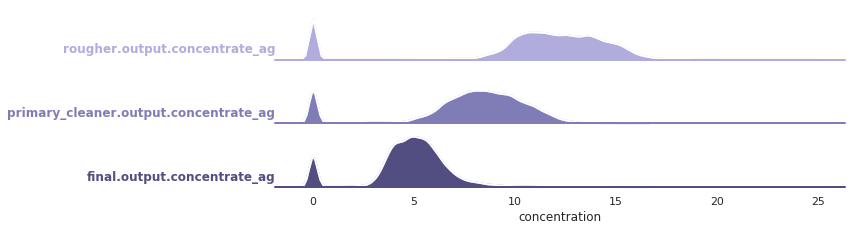

In [9]:
# Ag levels at each stage

ag_cols = ['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
overlap_hist(full, ag_cols, 'stage', 'concentration')

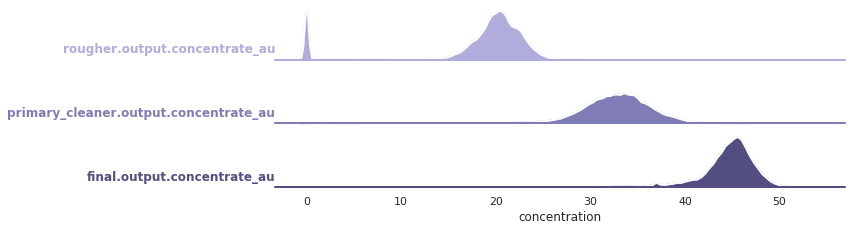

In [10]:
# Au levels at each stage

au_cols = ['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
overlap_hist(full, au_cols, 'stage', 'concentration')

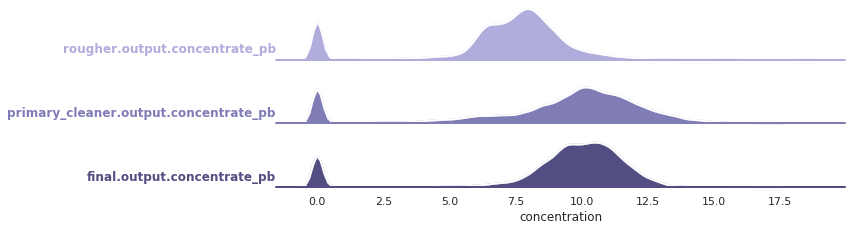

In [11]:
# Pb levels at each stage

pb_cols = ['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
overlap_hist(full, pb_cols, 'stage', 'concentration')

We see that all three metals (Pb, Au, Ag), after went through each stage (rougher, primary, secondary), has had less spread in terms of concertations. In the case of Pb and Au, their sample mean concentrations have even gone up to a higher value. For Ag, the other way around is true (its mean sample concentration has decreased).

----------
<font color='green'>

## Review

A very nice graphs, great job! There is a small increase of Pb concentration compared to Au, so we can conclude that purification is working :) 
    
</font>

---------

### 2.2 Observe feed particle size distributions among train and test sets

In [12]:
# Compare the feed particle size distributions in the training set and in the test set.

def conditional_means_obs(group1, group2, list_of_cols, id_var, melt_var, categorical, numerical, hue):
    
    sns.set(style="whitegrid")
    data1 = group1.copy()
    data2 = group2.copy()
    
    # "Melt" the dataset to "long-form" or "tidy" representation
    
    data1.loc[:,id_var] = 'train' 
    data2.loc[:, id_var] = 'test'
    data1 = data1[list_of_cols]
    data2 = data2[list_of_cols]
    
    data = pd.concat([data1, data2])
    data = pd.melt(data, id_vars = id_var, value_vars = melt_var, var_name=hue, value_name=numerical)
    
    # Initialize the figure

    fig_dims = (10, 5)
    f, ax = plt.subplots(figsize=fig_dims)
    sns.despine(bottom=True, left=True)
    
    # Show each observation with a scatterplot
    
    sns.stripplot(x=numerical, y=categorical, hue=hue, data=data, dodge=True, alpha=.5, zorder=1)
    sns.pointplot(x=numerical, y=categorical, hue=hue, data=data, dodge=True, join=False, palette='dark',
                  markers='x', scale=.85, ci=None)
    
    # Improve the legend 
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles,['group observations', 'group mean'], loc="lower right", frameon=False, ncol=2)

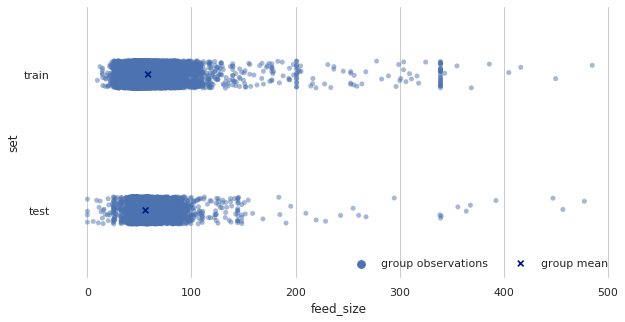

In [13]:
temp = ['rougher.input.feed_size', 'set']
conditional_means_obs(train, test, temp, temp[1], temp[0], 'set', 'feed_size', 'stage')

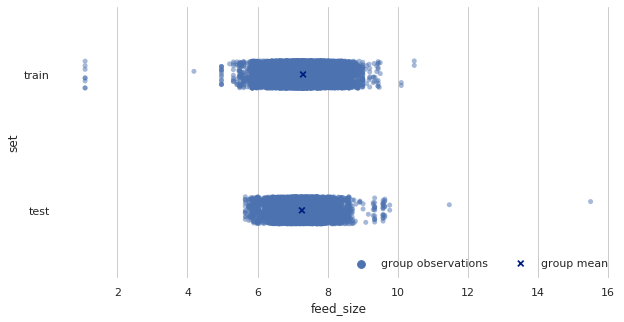

In [14]:
temp = ['primary_cleaner.input.feed_size', 'set']
conditional_means_obs(train, test, temp, temp[1], temp[0], 'set', 'feed_size', 'stage')

It's observed that the feed size in both rougher and primary stage is consistant between train and test sets.

----------
<font color='green'>

## Review

That is true :)
    
</font>

---------

### 2.3 Consider the total concentrations of all substances at different stages

In [15]:
# Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 
# Do you notice any abnormal values in the total distribution?

# For this task, I will use the train set instead the full dataset since the index of the train set has been changed so there 
# will be extra work to find out which row from the train set belongs to which index from the full dataset. Another reason is
# that the outlier problem largely is a training problem, so we will need to address this problem anyway in the training
# set.

temp = train.copy()
temp['final_total_concentrations'] = train['final.output.concentrate_sol'] + \
    train['final.output.concentrate_au'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_ag']
temp['rougher_output_total_concentrations'] = train['rougher.output.concentrate_sol'] + \
    train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_ag']
temp['rougher_input_total_concentrations'] = train['rougher.input.feed_sol'] + \
    train['rougher.input.feed_au'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_ag']

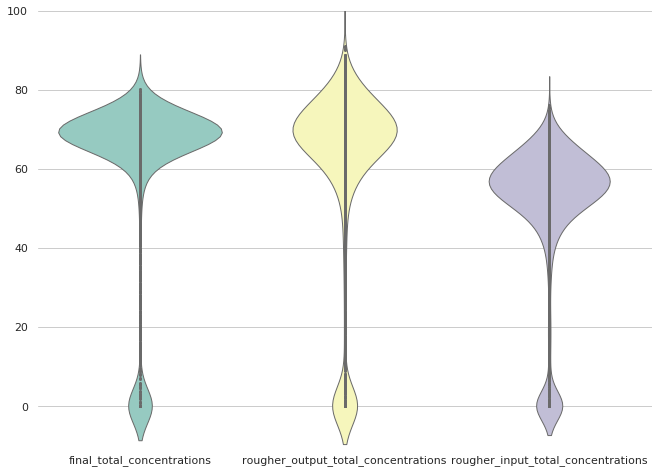

In [16]:
# use violinplots to compare three total concentration distributions

f, ax = plt.subplots(figsize=(11, 8))

# Show each distribution with both violins and points

temp2 = temp[['final_total_concentrations','rougher_output_total_concentrations','rougher_input_total_concentrations']]
sns.violinplot(data=temp2, palette="Set3", bw=.2, cut=2, linewidth=1, inner="points")

# Finalize the figure

ax.set(ylim=(-10, 100))
sns.despine(left=True, bottom=True)

After sum up all metal concentrations into one greater value, we still observe that some observations' total concentrations are around 0-5 range. They are suspected to be outliers of the data and we will remove them from the train set.

In [17]:
# Remove outliers

outliers_idx = train.index.isin(temp2.query('final_total_concentrations < 10').index)
train_without_outliers = train[~outliers_idx].drop('date', axis=1)

----------
<font color='green'>

## Review

Good point, these are probably some technical errors.
    
</font>

---------

### Conclusion

No problem were found in this part of the project. the data at this point is good to be used in modeling. 

# Step 3. Build the model

1. Write a function to calculate the final sMAPE value.
2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

### 3.1 Evaluation functions

In [18]:
# Write a function to calculate the final sMAPE value.
# Before this, I need to first create a function for calculating the sMAPE values

def sMAPE(y_pred, y_true):
    result = np.mean((abs(y_true - y_pred))/((abs(y_true)+abs(y_pred))/2)*100)
    return result

sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

- Since we were given instruction to use the sMAPE metric as the loss function, thus we need to make a function for it then make it callable during tuning the cross-validation.
- Since this function calculates losses, our goal is to minimize it. However, the default optimization behaviour of scikit learn is to maximize function values over iterations (or batches); thus we purposely make our customized loss function negative by assigning false to the parameter of make_scorer function. This will make all loss values calculated from our loss function negative so the optimizer will seek to bring it close to 0 thus achieving low loss values in reality. 
- From an interpretation stand point, this does make things seems not normal at first, I will use an example. If our loss is 24, default scikit learn will try to "optimize" so that in next iteration, the loss will be higher than the previous round and this is something we don't want. So by including a negative sign in the beginning, this value now became -24 and when scikit learn tries to optimize, this value will have a good chance to be reduced to a negative number that's close to 0. So from mathematical stand point, the loss is maximized but in reality, we just achieved a minimized loss value. 

----------
<font color='green'>

## Review

That's great! You have a very deep understanding of how optimization process works in sklearn :)
    
</font>

---------

### 3.2.1 Modeling for the rougher stage

In [19]:
# Data preparation for the rougher stage

cols = [col for col in train_without_outliers.columns if 'rougher' in col and col in test.columns] + ['rougher.output.recovery']
train_rougher = train_without_outliers[cols]

# Create val set for tuning purpose 

train_rougher, val_rougher = train_test_split(train_rougher, test_size=0.20, random_state=123)

# Standardize before regress

scaler = StandardScaler()
x_train_rougher = train_rougher.drop('rougher.output.recovery', axis=1)
x_val_rougher = val_rougher.drop('rougher.output.recovery', axis=1)

x_train_rougher = scaler.fit_transform(x_train_rougher)
x_val_rougher = scaler.fit_transform(x_val_rougher)

# Finish the train-test splitting

y_train_rougher, y_val_rougher = train_rougher['rougher.output.recovery'], val_rougher['rougher.output.recovery']

- The goal of 3.2.1 is to learn off of rougher.output.recovery. This is our first target variable, and I plan to only include variables that are relevant to this target. In other words, only bringing in variables that recorded during the rougher stage. 
- My main concern is information lekage and I don't think it is fair to let the model to use facts that happened later to predict what was going to happen before. 
- I will leave the 4 rougher tail variables included for now and if model became overfitting due to the formula design of the recovery variable, I will further exclude those as well.

----------
<font color='red'>

## Review

You should only use those features, which are available in ``test`` dataset. The reason they are not included in ``train`` is that we can't calculate them during technological process :) Your model should make a prediction without knowing them.
    
</font>

---------

<div class="alert alert-warning" role="alert">
Here I changed the way that's used to create a list of columns. Now we are only using rougher variables that appear from the test set. 
    
    New code: [col for col in train_without_outliers.columns if 'rougher' in col and col in test.columns]
    
The standardize and train-test split is changed accordingly as well. 
</div>

In [20]:
# Baseline performance

rougher_baseline_elast = cross_validate(ElasticNet(random_state=123, selection='random'), x_train_rougher, y_train_rougher, 
                                        scoring=sMAPE_score, cv=5, n_jobs=-1, error_score='raise')
rougher_baseline_elast['test_score'].mean()

-26.189491249346055

In [21]:
# Tuned performance

params = {'alpha': list(np.linspace(0.1,1,100)), 'l1_ratio': list(np.linspace(0.1,0.9,100))}
rougher_tune_elast = RandomizedSearchCV(estimator=ElasticNet(random_state=123, selection='random'), param_distributions=params, 
                                        n_iter=30, scoring=sMAPE_score, n_jobs=-1, cv=5)
rougher_tune_elast.fit(x_train_rougher, y_train_rougher)
rougher_tune_elast.best_params_, rougher_tune_elast.best_score_

({'l1_ratio': 0.1, 'alpha': 0.9454545454545454}, -26.15664997004604)

It looks like tuning does not make a difference and we have a high loss value here. Next, I will graph learning curve for the train and validation set to see determine model's variance and bias.

In [22]:
def learning_curve_graph(model, x, y, scorer, tune_params, tune_result, title, x_label, y_label):

    # Initialize a learning curve figure

    fig, axes = plt.subplots(1, 1, figsize=(8, 7))
    axes.set_title(title)
    axes.set_ylim(tune_result[0], tune_result[1])
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)

    # learning curve calculations

    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    train_sizes, train_scores, test_scores = \
    learning_curve(model(**tune_params), 
                   x, y, scoring=scorer,
                   cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the curve

    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    axes.legend(loc="best")

In [23]:
model = ElasticNet
x = x_train_rougher
y = y_train_rougher
scorer = sMAPE_score
tune_params = rougher_tune_elast.best_params_
tune_result = [rougher_tune_elast.best_score_-3, rougher_tune_elast.best_score_+3]
title = "Learning Curves (ElasticNet)"
x_label = "Training examples"
y_label = "sMAPE"

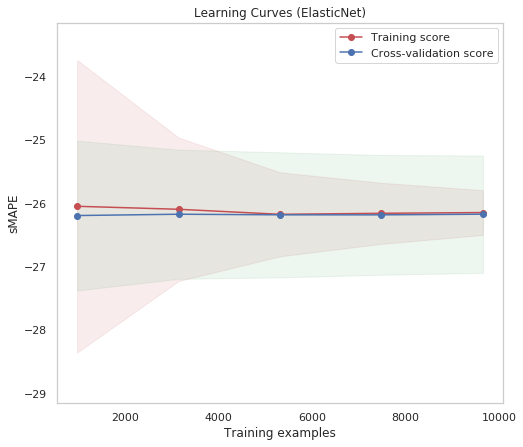

In [24]:
learning_curve_graph(model, x, y, scorer, tune_params, tune_result, title, x_label, y_label)

ElasticNet: High bias low variance - Underfitting
- From 3000 training data points onward, the validation loss stays roughly the same. This tells us adding more training data points won’t lead to significantly better models. So we need to try something like switching to an algorithm that can build more complex models.
- The main takeaway from this graph is that our model seriously suffers from high bias and low variance, hence underfitting the training data. We see that both losses stayes at a value of approximately -26 given the context of our loss function, sMAPE. 
- Since the variance of a learning algorithm is low, the algorithm is likely to come up with simplistic ways to predict as we change the training sets to validation sets. Because the models are overly simplified, they cannot even fit the training data well (hence underfit the data), and thus we have both high training and validation loss in return. 
- However, a good news is that our model does not overfits which means that including the 4 tail variables does not involve information leakage. 


In [25]:
# Random forest model for performance comparison 

rougher_baseline_rf = cross_validate(RandomForestRegressor(n_estimators=100, random_state=123), x_train_rougher, y_train_rougher, 
                                     scoring=sMAPE_score, cv=5, n_jobs=-1, error_score='raise')
rougher_baseline_rf['test_score'].mean()

-22.41148140400224

Loss is reduced by using a random forest model.

In [26]:
# Tuned random forest model performance

params = {'n_estimators': [100], 'min_samples_split': list(np.linspace(0.01,0.5,100)), 
          'min_samples_leaf': list(np.linspace(0.01,0.5,100))}
rougher_tune_rf = RandomizedSearchCV(RandomForestRegressor(random_state=123), 
                                     param_distributions=params, n_iter=30, scoring=sMAPE_score, n_jobs=-1, cv=3)
rougher_tune_rf.fit(x_train_rougher, y_train_rougher)
rougher_tune_rf.best_params_, rougher_tune_rf.best_score_

({'n_estimators': 100,
  'min_samples_split': 0.08424242424242423,
  'min_samples_leaf': 0.03474747474747475},
 -25.878346842051332)

Looks like there is no performance gain due to parameter tuning over using just the default parameters.

In [27]:
model = RandomForestRegressor
x = x_train_rougher
y = y_train_rougher
scorer = sMAPE_score
tune_params = RandomForestRegressor(n_estimators=10, random_state=123).get_params()
tune_result = [-38, -8]
title = "Learning Curves (RandomForestRegressor)"
x_label = "Training examples"
y_label = "sMAPE"

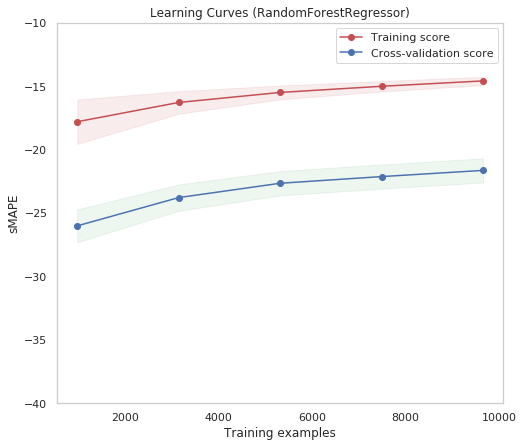

In [28]:
learning_curve_graph(model, x, y, scorer, tune_params, tune_result, title, x_label, y_label)

Random Forest: High bias, high variance, but showing a trend of continuous improvement

- We see that both the training curve and validation curve shows continuous improvements over larger and larger training sets.
- This means adding more data will benefit the model and I think the effect of doing that will even expedite when combine with adding more features at the same time.
- At this point, the model still underfits because the training curve still has relatively high loss while at the same time it continues to decrease at the end of the plot which indicates that the model is capable of further learning and possible further improvements.
- There is a high variance between the two curves. This is potentially due to the reason that random forest is a non-paramatric model, and the dimension of the data that we are feeding in is too shallow for it. So the model will force itself to memorize some of the answers hence not generalize well during validation. 
- I presume that when we use a random forest model to predict final recovery, we would see two curves that have much smaller gap between them. This is because the model is capable of learning, and we have more dimensions from the data.

----------
<font color='green'>

## Review

Good use of ``learning_curve()``! You provide a very thoughtful analysis of model performance. 
    
</font><font color='red'>

But why not trying some other type of regressor? :) We at least need to have something to compare our model with.
    
</font>

---------

<div class="alert alert-warning" role="alert">
I made a new function to graph the learning curve. I've also added a Random Forest regressor to compare performance. 
</div>

### 3.2.2 Model for the final stage

- During this part, the goal is to train a model to learn off of the final target variable. Since this final target is a fact that happens after all stages have had taken place, it is fair to use all variables are predictors. 
- However, due to my concern of the potential high correlation between rougher.output.recovery and final.output.recovery, I will replace rougher.output.recovery with first stage model predictions. This is to manually introduce some noise to confuse the model rather letting it heavily depend on one feature. 

----------
<font color='green'>

## Review

A reasonable decision to add a rougher recovery feature :) You can't use real rougher recovery for the same reason as you can't use features missing in ``test`` set. But to add predicted variable is not illegal.
    
</font>

---------

In [29]:
# Data preparation for the final stage 

train_final, val_final = train_test_split(train_without_outliers, test_size=0.20, random_state=123)

# Standardize before regress

scaler = StandardScaler()
cols = [col for col in train_final.columns if 'recovery' not in col]
train_final[cols] = scaler.fit_transform(train_final[cols])
val_final[cols] = scaler.fit_transform(val_final[cols])

# train-test split preparation for the rougher stage predictions

cols = [each for each in cols if 'rougher' in each and each in test.columns]
x_train_rougher, x_val_rougher = train_final[cols], val_final[cols]
y_train_rougher, y_val_rougher = train_final['rougher.output.recovery'], val_final['rougher.output.recovery']

# append the rougher stage predictions to train and val sets

y_pred_rougher1 = RandomForestRegressor(n_estimators=100, random_state=123).fit(x_train_rougher, y_train_rougher).predict(x_train_rougher)
train_final['rougher.output.predictions'] = y_pred_rougher1

y_pred_rougher2 = RandomForestRegressor(n_estimators=100, random_state=123).fit(x_val_rougher, y_val_rougher).predict(x_val_rougher)
val_final['rougher.output.predictions'] = y_pred_rougher2

# Repeat the train-test splitting for the final stage model training

cols = [col for col in train_final.columns if 'recovery' not in col and col in test.columns]+['final.output.recovery']
x_train_final, x_val_final = train_final[cols].drop('final.output.recovery', axis=1), \
val_final[cols].drop('final.output.recovery', axis=1)
y_train_final, y_val_final = train_final['final.output.recovery'], val_final['final.output.recovery']

In [30]:
# Baseline performance

final_baseline_elast = cross_validate(ElasticNet(random_state=123, selection='random'), x_train_final, y_train_final, 
                                      scoring=sMAPE_score, cv=5, n_jobs=-1, error_score='raise')
final_baseline_elast['test_score'].mean()

-9.740855939560795

In [31]:
# Tuned performance

params = {'alpha': list(np.linspace(0.1,1,100)), 'l1_ratio': list(np.linspace(0.1,0.9,100))}
final_tune_elast = RandomizedSearchCV(estimator=ElasticNet(random_state=123, selection='random'), param_distributions=params, 
                                      n_iter=30, scoring=sMAPE_score, n_jobs=-1, cv=5)
final_tune_elast.fit(x_train_final, y_train_final)
final_tune_elast.best_params_, final_tune_elast.best_score_

({'l1_ratio': 0.17272727272727273, 'alpha': 0.1090909090909091},
 -9.221758989949585)

In [32]:
model = ElasticNet
x = x_train_final
y = y_train_final
scorer = sMAPE_score
tune_params = final_tune_elast.best_params_
tune_result = [final_tune_elast.best_score_-2, final_tune_elast.best_score_+2]
title = "Learning Curves (ElasticNet)"
x_label = "Training examples"
y_label = "sMAPE"

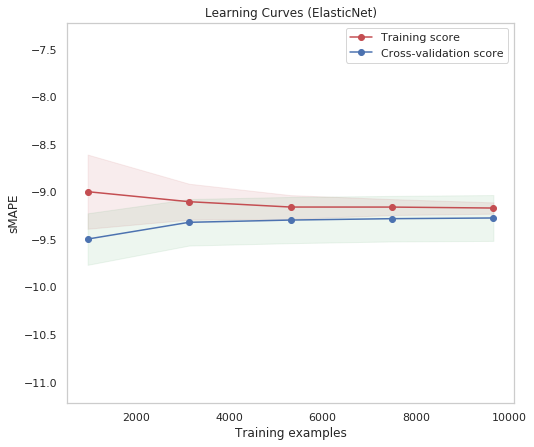

In [33]:
learning_curve_graph(model, x, y, scorer, tune_params, tune_result, title, x_label, y_label)

ElasticNet: medium bias and low variance, a very stable model
- We can see that as training sample size increases, the training error gradually increases to -9.25 while the cv error decreases to the same level likewise. This is to be expected since the model has no problem fitting small size training set. So when tested, the prediction is relatively perfect. As more and more data is included, we observe that training and validation error that achieves to a point of stability with a minimal gap between the two.
- Now let’s analyze the variance. This can be done by examining the gap between the validation learning curve and training learning curve. In our case, the gap is very narrow, so we can safely conclude that the variance is low. 
- As a conclusion, a plot of learning curves shows a good fit if The plot of training loss decreases to a point of stability. The plot of validation loss decreases to a point of stability and has a small gap with the training loss. This is exact what we observe from our learning curves. However, the only concern still remains is that the bias of this model is still somewhere medium. So an intuitive next step is to compare these curve with the random forest ones'. 




In [34]:
# Baseline performance

final_baseline_rf = cross_validate(RandomForestRegressor(n_estimators=100, random_state=123), x_train_final, y_train_final, 
                                scoring=sMAPE_score, cv=5, n_jobs=-1, error_score='raise')
final_baseline_rf['test_score'].mean()

-6.325715377660417

We consistently observe that the random forest model outperforms ElasticNet.

In [35]:
# Tuned performance

params = {'n_estimators': [100], 'min_samples_split': list(np.linspace(0.01,0.5,100)), 'min_samples_leaf': list(np.linspace(0.01,0.5,100))}
final_tune_rf = RandomizedSearchCV(RandomForestRegressor(random_state=123), param_distributions=params, n_iter=30, 
                                   scoring=sMAPE_score, n_jobs=-1, cv=3)
final_tune_rf.fit(x_train_final, y_train_final)
final_tune_rf.best_params_, final_tune_rf.best_score_

({'n_estimators': 100,
  'min_samples_split': 0.04464646464646465,
  'min_samples_leaf': 0.059494949494949496},
 -8.987462860169064)

In [36]:
model = RandomForestRegressor
x = x_train_final
y = y_train_final
scorer = sMAPE_score
tune_params = RandomForestRegressor(n_estimators=10, random_state=123).get_params()
tune_result = [-15, 0]
title = "Learning Curves (RandomForestRegressor)"
x_label = "Training examples"
y_label = "sMAPE"

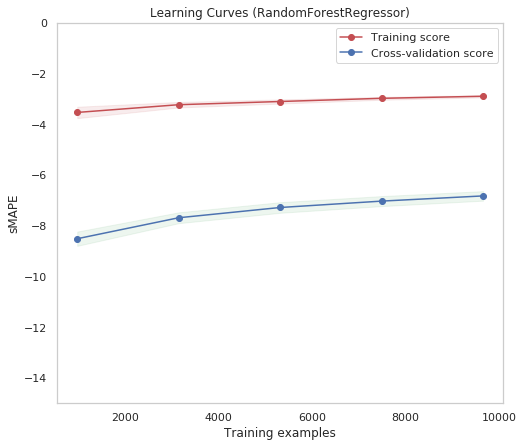

In [37]:
learning_curve_graph(model, x, y, scorer, tune_params, tune_result, title, x_label, y_label)

Random Forest: low bias, medium variance, still showing potentials to improve
- We can see that as training sample size increases, the validation loss gradually increase to -7 yet still showing a trend for continuous improvement. Given the context of how we customized eval metric in scikit-learn, this actually means that the validation loss decreases from 9 to 7.
- As the trend from both curves suggest, adding more data to the model would be beneficial because the bias shown to be smaller and smaller as training size increases. Another observation is that the gap between the training curve and validation curve is getting smaller and smaller as well. This indicatest that the variance is reduced as more data introduced to the mdoel. Basically at this point, the model is still capable of learning.
- Comparing the gap (leftmost points, from -3 to -9 ) between final stage learning curves with the gap between first stage learning curves (leftmost points, from -17 to -26), we see that the final stage gap is narrower, this indicates that variance level of the random forest model has reduced to a acceptable level.   
- While it is true that the training curve is positioned below the validation curve but the validation curve does not spike up nor does it keeps at the same level while the training curve continues to drop. So we can safely conclude that the model does not overfit.
- Comparing with the final stage learning curve when a ElasticNet model is used, we see that the ElasticNet produces more consistent results. However, given that the ElasticNet has higher bias and the random forest model, although variance is higher, still shows room to improve, it is resonable to conclude that random forest would the model of our choice from now on.

### 3.3 Final evaluation metric calculation and interpretation

In [38]:
# Final sMAPE evaluation for the ElasticNet model

y_pred_rougher = ElasticNet(**rougher_tune_elast.best_params_, \
                            random_state=123, selection='random').fit(x_train_rougher, y_train_rougher).predict(x_val_rougher)
y_pred_final = ElasticNet(**final_tune_elast.best_params_, \
                            random_state=123, selection='random').fit(x_train_final, y_train_final).predict(x_val_final)

.25*sMAPE(y_pred_rougher, y_val_rougher) + .75*sMAPE(y_pred_final, y_val_final)

13.498472867245482

In [39]:
# Final sMAPE evaluation for the Random Forest model

y_pred_rougher = RandomForestRegressor(n_estimators=100, random_state=123).fit(x_train_rougher, y_train_rougher).predict(x_val_rougher)
y_pred_final = RandomForestRegressor(n_estimators=100, random_state=123).fit(x_train_final, y_train_final).predict(x_val_final)

.25*sMAPE(y_pred_rougher, y_val_rougher) + .75*sMAPE(y_pred_final, y_val_final)

11.488554339167194

As a final evaluation, the random forest model does outperform the elastic net model by about 2 points. Therefore, our final loss is 11.488 sMAPE.

In [40]:
# Does our model perform better than a constant (e.g. always predicting mean target value)?

.25*sMAPE(pd.Series(np.repeat(np.mean(y_val_rougher), len(y_val_rougher))).values.reshape(len(y_val_rougher),), y_val_rougher)+\
.75*sMAPE(pd.Series(np.repeat(np.mean(y_val_final), len(y_val_final))).values.reshape(len(y_val_final),), y_val_final)

14.792287602596826

The random forest model significantly outperforms a constant which is always predicting mean target value.

In [41]:
# What is sMAPE for our test sample?
# find targets for test in the full dataset

test, full = test.set_index('date'), full.set_index('date')
temp = test.join(full, how='left', lsuffix='_test')
y_true_test = temp['final.output.recovery']

# preparing the test set to be used in a model

vars_with_na = [var for var in test.columns if test[var].isnull().sum() > 0]
for var in vars_with_na:
    mode_val = test[var].mode()[0]
    test[var] = test[var].fillna(mode_val)

In [42]:
y_pred_test = RandomForestRegressor(n_estimators=100, random_state=123).fit(x_train_final, y_train_final).predict(test)
sMAPE(y_pred_test, y_true_test)

11.228597126438881

----------
<font color='green'>

## Review
    
Great job! But let's add some extra work on model selection:  
    
</font><font color='red'>
- would any other type of regressor give us a better predictions?
- does our model perform better than a constant (e.g. always predicting mean target value)?
- what is sMAPE for our test sample? (you need to find targets for test in the full dataset)     
    
</font>

---------

<div class="alert alert-warning" role="alert">
Thank you for all the suggestions, and the time to review my project again.
</div>